<!--Header-->
<div style="background-color: #fff; color: black">
    <div style="padding-bottom: 20px; display: flex; justify-content: space-between; align-items: flex-start;">
        <div style="width: 60%;">
            <h1 style="margin: 16px">TFG - Inteligencia Artificial</h1>
            <p style="margin: 16px; padding-bottom: 0">Junio de 2025</p>
        </div>
        <div style="width: 40%; text-align: right">
            <img src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" alt="Logo UOC">
        </div>
    </div>
    <h2 style="text-align: justify; padding: 0 16px">Aplicación de técnicas de IA fiable en la predicción del índice de calidad de vida en personas con tratamiento oncológico mediante aprendizaje automático.</h2>
    <div style="background-color: #000; width: 100%; height: 2px; margin: 24px 0"></div>
    <div style="padding: 20px">
        <h4 style="margin: 0 0; padding: 0 0">Pablo Pimàs Verge</h4>
        <h5 style="margin: 0 0; padding: 0 0">Grado en Ingeniería Informática</h5>
        <h5 style="margin: 0 0 4px; padding: 0 0">Inteligencia Artificial</h5>
        <h4 style="margin: 8px 0 4px; padding: 0 0">Dra. María Moreno de Castro</h4>
        <h4 style="margin: 0 0; padding: 0 0">Dr. Friman Sanchéz</h4>
    </div>
</div>

<!--/Header-->

# Fase 2
#### Primera Parte
##### - Análisis exploratorio de los datos
##### - Preparación de los datos

# Análisis exploratorio y preparación de los datos

Este cuaderno corresponde a la primera parte de la fase 2 del plan de trabajo del TFG. A continuación, se abordan las tareas de análisis exploratorio y preparación de los datos en el marco de CRISP-DM.

#### - Origen de los datos

Los datos corresponden a la encuesta realizada a mujeres, en el inicio del tratamiento de cáncer de mama entre 2016 y 2021, por la Charité – Universitätsmedizin Berlin. Los mismos han sido compartidos por Gebert Pimrapat en el repositorio Mendeley Data [1]. El cuestionario utilizado consta de tres dominios: datos basales socio-demográficos, formulario genérico para cáncer EORTC QLQ-C30 (C30) y módulo específico para cáncer de mama EORTC QLQ-C23 (C23). Para los cuestionarios C30 y C23, el conjunto contiene los índices ya calculados de las variables, de acuerdo con las respuestas de cada participante. La variable objetivo pertenece al formulario genérico (C30) y es el índice de calidad de vida (QoL, Quality of Life).

Durante el trabajo se utilizarán únicamente los datos pertenecientes a los formularios C23 y C30, dado que se trata de la información estandarizada por la EORTC y es extrapolable a otros estudios internacionales. En consecuencia, los datos basales se descartarán por ser propios de cada institución sanitaria o país.

#### - Objetivos

En el presente cuaderno se realizarán las siguientes acciones: 

- Separación del conjunto en los 2 dominios a utilizar: df_C30 y df_C23
- Analizar y explorar cada conjunto por separado
- Analizar y explorar las relaciones entre ambos conjuntos
- Preparar la variable objetivo para la clasificación
- Generar un conjunto unificado con todas las variables: df_C30_C23
- Separar los datos de df_C30 y df_C30_C23 en los conjuntos de: entrenamiento, prueba, validación y calibración

### Índice

1. Análisis Exploratorio
    - Dominio C30
    - Dominio C23
    - Análisis Unificado  
2. Preparación de los datos


### Importaciones

In [1]:
# Importaciones de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import KBinsDiscretizer
# Funciones auxiliares
import aux_functions as afn

In [2]:
# Configuraciones
%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format
plt.rc('font', size=10)
sns.set_theme(style="whitegrid")

### Carga de los datos

In [3]:
# Carga de los datos en un dataframe de Pandas a partir del conjunto original en formato excel
file_path = "../data/Data_PROM_Baseline.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

### Diccionario



#### Atributos Basales
Información sobre aspectos socio-demográficos y la historia clínica de las pacientes en el momento del registro.

- Age: edad, en años
- weight: peso, en kg
- height: altura, en cm
- bmi: índice de masa corporal, en kg/cm$^2$
- marital_status: estado civil, 0: soltera | 1: en pareja | 2: separada | 3: viuda
- education: nivel de educación, 0: bajo | 1: medio | 2: alto
- alcohol: frecuencia del consumo de alcohol, 0: nunca | 1: ocasional | 2: semanal | 3: diaria
- smokingstatus: fumadora, 0: no | 1: si | 2: ex fumadora
- bust: dimensión del busto, de 1 a 13 hace referencia a los centímetros desde 65 hasta 125 con saltos de 5
- cupsize: medida del busto con relación al contorno del dorso, de 1 a 9 hace referencia a las tallas desde AA hasta H
- menstruation_firsttime_age: edad de la primera menstruación, en años
- menopause_yn: estado de menopausia, 0: no | 1: si
- birth_number: cantidad de partos, de 0 a 7 indica el número, 8 indica más de 7
- pregnancy_number: cantidad de embarazos, de 0 a 7 indica el número, 8 indica más de 7
- comorb_none: tiene comorbidades, 0: no | 1: si
- comorb_heart: enfermedades coronarias, 0: no | 1: si
- comorb_hypertension: hipertensión, 0: no | 1: si
- comorb_paod: oclusión periférica arterial, 0: no | 1: si
- comorb_diabetes: diabetes, 0: no | 1: si
- comorb_kidney: enfermedades renales, 0: no | 1: si
- comorb_liver: enfermedades hepáticas, 0: no | 1: si
- comorb_stroke: ACV o derrames, 0: no | 1: si
- comorb_neuological: enfermedades neurológicas, 0: no | 1: si
- comorb_cancerlast5years: cancer en los últimos 5 años, 0: no | 1: si
- comorb_depression: depresión, 0: no | 1: si
- comorb_gastrointestinal: enfermedades gastrointestinales, 0: no | 1: si
- comorb_endometriosis: endometriosis, 0: no | 1: si
- comorb_arthritis: artritis, 0: no | 1: si
- comorb_incontinence: incontinencia, 0: no | 1: si
- comorb_uti: infecciones urinarias, 0: no | 1: si
- cancer_breast: cancer de mama en los últimos 5 años, 0: no | 1: si
- contraceptive_kind: uso de anticonceptivos, 0: ninguno | 1: oral | 2: inyección | 3: diafragma | 4: Hormonal | 5: implante | 6: Cobre DIU
- pre_op: cirugía de cancer previa, 0: no | 1: si
- cancer_kind_family_1: anttecedentes familiares de cancer de útero o mama, 0: no | 1: si
- breastcancer_first: primer cancer de mama, 0: no | 1: si
- diagnosis: diagnóstico, 1: cancer de mama | 2: DCIS | 3: fibroadenoma | 4: otros tipos
- lateral: lado afectado, 0: izquierdo | 2: derecho | 3: ambos
- histotype: tipo histológico de cancer, 0: tumor primario | 1: invasivo ductal | 2: invasivo lobular | 888: otro | 999: desconocido
- gradeinv: grado, 0: grado 1 | 1: grado 2 | 2: grado 3 | 3: no especificado
- erstatus: estado del receptor de estrógeno, 0: negativo | 1: positivo | 2: sin medición | 999: desconocido
- prstatus: estado del receptor de progesterona, 0: negativo | 1: positivo | 2: sin medición | 999: desconocido
- her2status: estado del receptor de HER2, 0: negativo | 1: positivo | 2: sin medición | 999: desconocido

#### EORTC QLQ-C30
Índices calculados del formulario genérico para cáncer (CORE), son de tipo decimal (float) discreto.

- **ql: índice de calidad de vida (QoL), variable objetivo**
- pf: funcionamiento físico
- rf: funcionamiento de rol (actividades habituales y responsabilidades cotidianas laborales y domésticas)
- ef: funcionamiento emocional
- cf: funcionamiento cognitivo
- sf: funcionamiento social
- fa: fatiga
- nv: náuseas y vómitos
- pa: dolor
- dy: disnea (dificultad para respirar)
- sl: insomnio
- ap: pérdida de apetito
- co: constipado
- di: diarrea
- fi: dificultades financieras

#### EORTC QLQ-C23
Índices calculados del formulario específico para cancer de mama, son de tipo decimal (float) discreto.

- brbi: imagen del propio cuerpo
- brsef: funcionamiento sexual
- brsee: disfrute sexual
- brfu: perspectiva de futuro
- brst: síntomas en el brazo
- brbs: síntomas en la mama
- bras: efectos secundarios de la terápia sistémica
- brhl: afectación por la caída del cabello


### 1. Análisis Exploratorio

### 1.1 Dominio EORTC QLQ-C30

Separación del dominio en el conjunto df_C30 y aplicación semántica a los nombres de los atributos

In [4]:
# Creación del dataframe C30
columns_C30 = ['id', 'ql', 'pf', 'rf', 'ef', 'cf', 'sf', 'fa', 'nv', 'pa', 'dy', 'sl', 'ap', 'co', 'di', 'fi']
df_C30 = df[columns_C30]
# Asignación de nombres semánticos a las columnas
df_C30 = df_C30.rename(columns= {
    'ql': 'QoL',
    'pf': 'Physical functioning',
    'rf': 'Role functioning',
    'ef': 'Emotional functioning',
    'cf': 'Cognitive functioning',
    'sf': 'Social functioning',
    'fa': 'Fatigue',
    'nv': 'Nausea and vomiting',
    'pa': 'Pain',
    'dy': 'Dyspnea',
    'sl': 'Insomnia',
    'ap': 'Appetite loss',
    'co': 'Constipation',
    'di': 'Diarrhea',
    'fi': 'Financial difficulties',
})

Realizamos una primera exploración de la información relevante de los atributos del dominio: 

In [5]:
# Inspección de las columnas del dominio
afn.inspect_all_columns(df_C30.drop('id', axis=1))

,dtype,null_count,unique_values,total_unique_values,skew,count,mean,std,min,25%,50%,75%,max
column_name,,,,,,,,,,,,,
QoL,float64,249,"[0.0, 8.33, 16.67, 25.0, 33.33, 41.67, 50.0, 5...",13,-0.68,1478.00,67.45,22.40,0.00,50.00,66.67,83.33,100.00
Physical functioning,float64,249,"[6.67, 13.33, 20.0, 26.67, 33.33, 40.0, 46.67,...",15,-1.95,1478.00,88.37,17.49,6.67,86.67,93.33,100.00,100.00
Role functioning,float64,249,"[0.0, 16.67, 33.33, 50.0, 66.67, 83.33, 100.0]",7,-2.26,1478.00,88.48,23.34,0.00,83.33,100.00,100.00,100.00
Emotional functioning,float64,249,"[0.0, 8.33, 16.67, 25.0, 33.33, 41.67, 50.0, 5...",13,-0.46,1478.00,62.04,26.90,0.00,41.67,66.67,83.33,100.00
Cognitive functioning,float64,249,"[0.0, 5.56, 11.11, 16.67, 22.22, 27.78, 33.33,...",19,-0.73,1478.00,69.26,22.94,0.00,55.56,72.22,88.89,100.00
Social functioning,float64,249,"[0.0, 16.67, 33.33, 50.0, 66.67, 83.33, 100.0]",7,-1.51,1478.00,82.63,25.37,0.00,66.67,100.00,100.00,100.00
Fatigue,float64,249,"[0.0, 11.11, 22.22, 33.33, 44.44, 55.56, 66.67...",10,0.89,1478.00,27.18,25.78,0.00,0.00,22.22,44.44,100.00
Nausea and vomiting,float64,249,"[0.0, 16.67, 33.33, 50.0, 66.67, 83.33, 100.0]",7,3.13,1478.00,5.44,12.80,0.00,0.00,0.00,0.00,100.00
Pain,float64,249,"[0.0, 16.67, 33.33, 50.0, 66.67, 83.33, 100.0]",7,1.26,1478.00,21.47,26.40,0.00,0.00,16.67,33.33,100.00


#### TODO referenciar al porque se tiene ese tipo de valor con el cálculo de los índices 
El conjunto está compuesto por 1727 observaciones informadas con 15 variables pertenecientes a los índices del formulario C30, como se ha mencionado anteriormente. Para todos los atributos el tipo de dato es decimal (float). Sin embargo, la cantidad de valores únicos indica que se trata de series numéricas con intervalos determinados para cada una, es decir que son de tipo discreto. Los índices calculados que representan los valores hacen referencia a una escala de 0 a 100, con distintas variabilidades. Por un lado, los valores tienen una ordenación y sentido en cuanto sus magnitudes son comparables: para cada predictor 0 puede interpretarse como ***nada*** y 100 como ***mucho***. Por otro lado, la escala también indica que no existen valores atípicos (*outliers*), porque todos se encuentran dentro de esta.

De los valores de asimetría o sesgo (*skew*) y los cuartiles, se puede intuir que las variables de funcionamiento físico, rol, emocional, cognitivo y social tienen una distribución no normal con cola hacia la izquierda —mayor densidad en los valores altos—, con menor efecto en la variable objetivo QoL. En cambio, el resto de atributos muestran una distribución con cola hacia la derecha y una densidad en los valores bajos más extrema, con menor efecto en fatiga e insomnio. 

En cuanto a los valores ausentes, todas las variables contienen 249 observaciones nulas. Dada la similitud, vamos a estudiar si se trata de las mismas filas mal informadas para todas ellas y determinar la viabilidad de su eliminación.


In [6]:
# Inspección de las variables con las mismas observaciones nulas
afn.rows_same_nulls(df_C30)


Total rows with missing values:  249
Variables with identical missing rows:  15
QoL
Physical functioning
Role functioning
Emotional functioning
Cognitive functioning
Social functioning
Fatigue
Nausea and vomiting
Pain
Dyspnea
Insomnia
Appetite loss
Constipation
Diarrhea
Financial difficulties


In [7]:
# Inspección de filas con valores nulos
df_C30[df_C30['QoL'].isnull()].head()

,id,QoL,Physical functioning,Role functioning,Emotional functioning,Cognitive functioning,Social functioning,Fatigue,Nausea and vomiting,Pain,Dyspnea,Insomnia,Appetite loss,Constipation,Diarrhea,Financial difficulties
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Las 15 variables contienen valores nulos en las mismas filas. Al visualizar 5 de ellas, podemos comprobar que efectivamente todos sus atributos son nulos y que se trata de observaciones no informadas en el dominio C30. Por lo tanto, en la fase de limpieza se podrán eliminar y trabajar con las 1478 observaciones completas, sin alterar los resultados.

In [8]:
# Una vez identificadas las filas con valores nulos podemos descartar el identificador
df_C30.drop('id', axis=1, inplace=True)

Vamos a visualizar gráficamente la distribución de las variables, para comprobar que la información obtenida con la exploración es coherente:

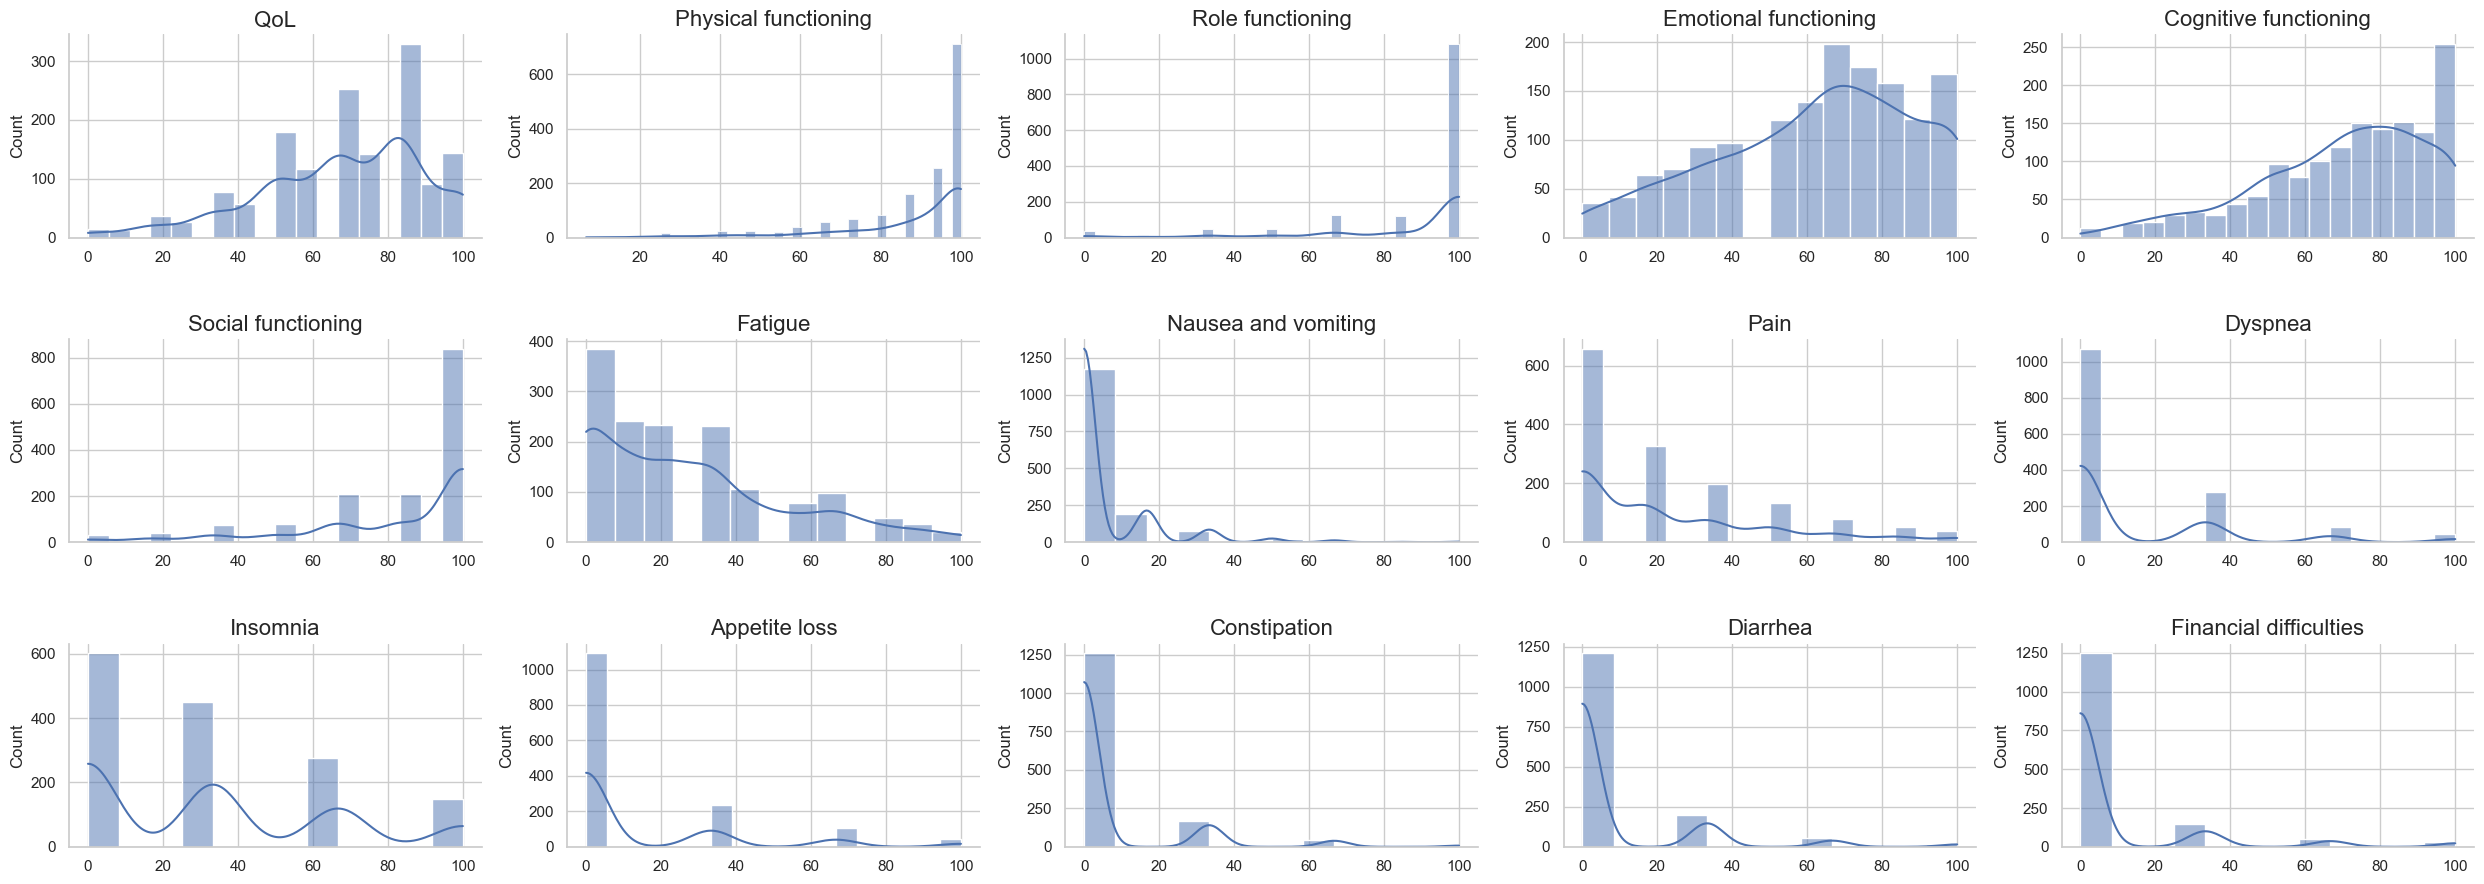

In [9]:
# Grilla de distribución de las variables del dominio
afn.viz_columns_distribution(df_C30)

Se puede comprobar que todas las variables presentan una distribución no gaussiana con colas a derecha o izquierda, con menos efecto en QoL, funcionamiento emocional, funcionamiento cognitivo, fatiga e insomnio. En el caso de la variable QoL, la variabilidad es suficiente para realizar la categorización en baja, media y alta que se utilizará para llevar a cabo la clasificación. Vamos a graficar la dispersión de los atributos para comparar rápidamente su variabilidad:

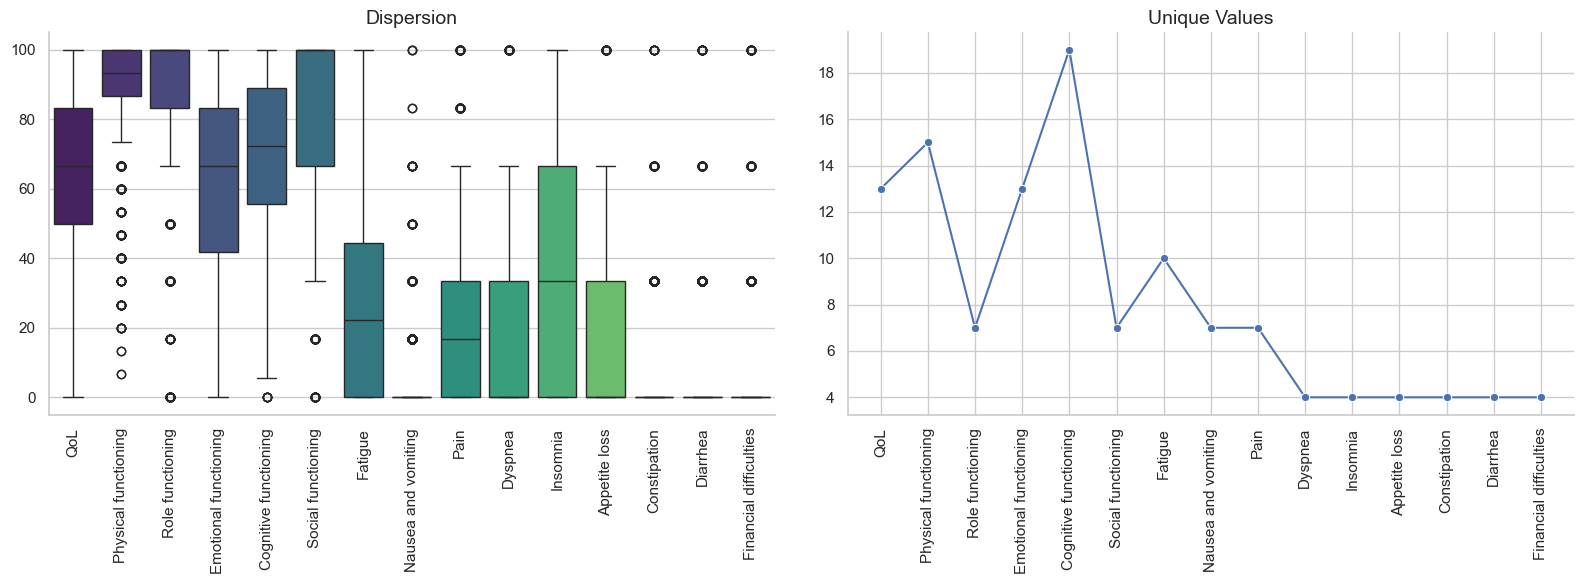

In [10]:
# Visualización comparativa de la dispersión y la cantidad de valores nulos 
afn.viz_dispersion(df_C30)

Como puede verse, la expresividad de las variables se encuentra diferenciada en aquellas con cola a la izquierda y las que presentan colas a la derecha. Por un lado, Constipation, Diarrhea, Financial difficulties y, en menor medida, Nausea and Vomiting tienen una dispersión menor de los valores que toman. Mientras, el resto de variables tienen una dispersión mayor, con medianas muy cercanas a los valores altos: Physical, Role y Social functioning; o los valores mínimos: Dyspnea y Apetite loss. En el caso de la variable objetivo, puede comprobarse que tiene una dispersión uniforme a lo largo de la escala con la mediana ligeramente desplazada hacía el rango superior. Por otro lado, se puede comprobar que la relación de la expresividad es independiente de la cantidad de valores únicos, como lo demuestran los casos de Dyspnea e Insomnia con pocos valores distribuídos de forma relativamente uniforme.

#### QoL - variable objetivo 
# TODO


### Physical functioning

*Índice de funcionamiento físico calculado: Capacidad física de desarrollar la vida cotidiana*

Observamos la relación que guarda el atributo con la variable objetivo. El gráfico de la izquierda muestra la proporción de los valores de QoL para cada valor que toma Physical functioning. Nos indica como se distribuye la percepción de la calidad de vida con respecto al funcionamiento físico. De esta forma, podemos ver que hay una relación directamente proporcional, ya que cuanto mejor es el funcionamiento físico se tiene una percepción de mayor calidad. Por su parte en el gráfico de la derecha, vemos como para valores bajos de QoL se encuentran valores en aproximadamente todo el rango de funcionamiento físico. Sin embargo, en la mitad superior de los valores de la variable objetivo cabe esperar valores cada vez más altos de funcionamiento físico. Por lo tanto, los gráficos indican que un buen funcionamiento físico no es condición suficiente para una mejor percepción de la calidad de vida, pero que una calidad de vida alta necesita de un buen funcionamiento físico, al menos un valor de 50 o superior para alcanzar el máximo de QoL.

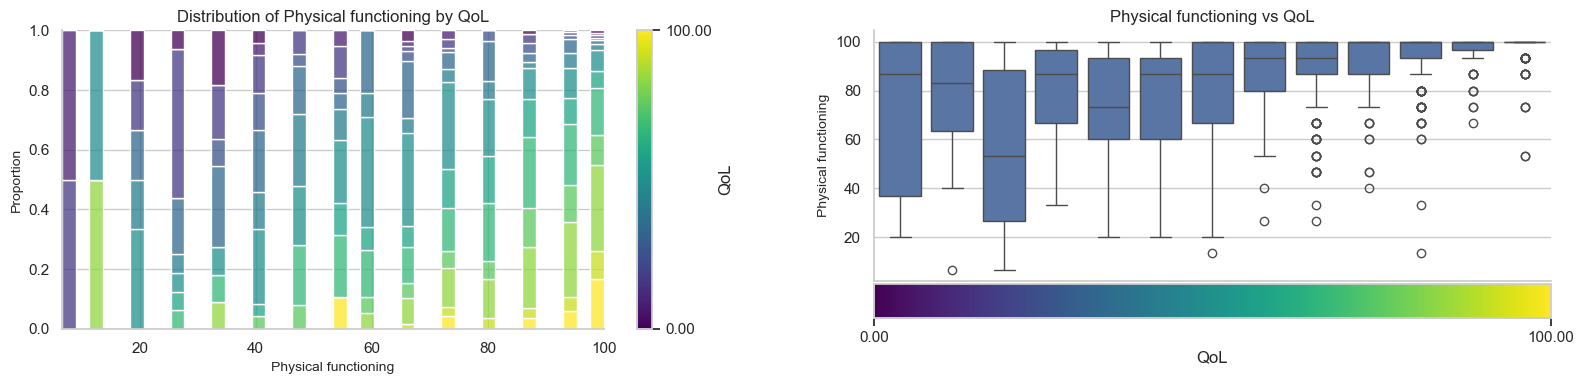



Statistics for Physical functioning by QoL values:



,count,mean,std,min,25%,50%,75%,max
QoL,,,,,,,,
0.00,15.00,70.67,31.55,20.00,36.67,86.67,100.00,100.00
8.33,12.00,75.56,29.99,6.67,63.33,83.33,100.00,100.00
16.67,36.00,59.81,30.84,6.67,26.67,53.33,88.33,100.00
25.00,27.00,78.27,22.08,33.33,66.67,86.67,96.67,100.00
33.33,77.00,71.17,22.10,20.00,60.00,73.33,93.33,100.00
41.67,57.00,77.66,22.73,20.00,60.00,86.67,93.33,100.00
50.00,180.00,79.93,19.68,13.33,66.67,86.67,100.00,100.00
58.33,116.00,87.99,13.82,26.67,80.00,93.33,100.00,100.00
66.67,252.00,90.05,13.80,26.67,86.67,93.33,100.00,100.00


In [11]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Physical functioning')


En la tabla anterior, se muestran las estadísticas de funcionamiento físico para cada valor que toma QoL. Claramente, se observa como a partir de un valor de QoL de 50 se tienen valores máximos de funcionamiento físico en el tercer cuartil, con desviaciones cada vez más estrechas y medias que superan los 90. Además, las concentraciones mayores de observaciones también se pueden ver por encima de un valor 50 del QoL, con un máximo de 329 en 83.33, indicando que la mayoría de las personas encuestadas tiene una sensación del funcionamiento físico relativamente buena que incide positivamente en la percepción de la calidad de vida.

### Role Functioning
*Índice de funcionamiento de rol calculado: Capacidad de llevar a cabo las tareas cotidianas propias del ámbito doméstico y laboral*

El funcionamiento de rol guarda una relación con QoL similar al caso anterior, aunque aún más pronunciada. Vemos como los valores más altos de calidad de vida se encuentran con mayor proporción en los valores altos de la variable. Si bien para los valores bajos de QoL se encuentran valores distribuidos sobre todo el rango del predictor, a partir de un QoL de 50 se aprecia una mayor densidad hacia valores muy altos de la variables. Este hecho podría estar indicando que un buen desempeño del rol no implica necesariamente una buena calidad de vida, pero que una buena calidad de vida necesita un buen desempeño de rol mucho más marcado que el aspecto físico.

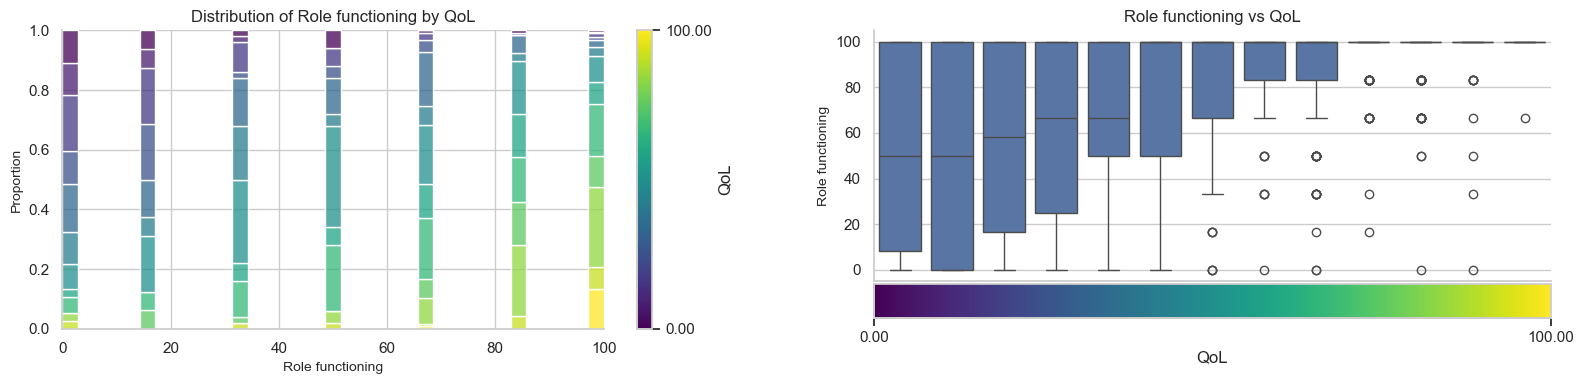



Statistics for Role functioning by QoL values:



,count,mean,std,min,25%,50%,75%,max
QoL,,,,,,,,
0.00,15.00,52.22,42.20,0.00,8.33,50.00,100.00,100.00
8.33,12.00,51.39,46.85,0.00,0.00,50.00,100.00,100.00
16.67,36.00,56.94,40.51,0.00,16.67,58.33,100.00,100.00
25.00,27.00,63.58,39.23,0.00,25.00,66.67,100.00,100.00
33.33,77.00,67.75,30.75,0.00,50.00,66.67,100.00,100.00
41.67,57.00,73.68,33.33,0.00,50.00,100.00,100.00,100.00
50.00,180.00,80.46,25.94,0.00,66.67,100.00,100.00,100.00
58.33,116.00,89.66,18.34,0.00,83.33,100.00,100.00,100.00
66.67,252.00,90.48,19.16,0.00,83.33,100.00,100.00,100.00


In [12]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Role functioning')


En la tabla podemos ver una tendencia similar al aspecto físico, aunque en este caso los valores máximos comienzan a encontrarse incluso antes del valor 50 de QoL. Si bien la desviación es un poco más amplia, reduciéndose hacia el máximo de QoL, encontramos una mayor densidad de los valores máximos incluso antes del valor 50 de QoL. Además, la mayor concentración de observaciones en el QoL 83,33, también corrobora que las personas encuestadas tienden a percibir un buen desempeño de rol y que este es necesario incluso para obtener valores medios de la calidad de vida. Sin embargo, la distribución uniforme de los valores de la variable en los rangos medio-bajos de QoL, indica que un buen desempeño no es condición suficiente para percibir una buena calidad de vida, incluso mucho menos que el aspecto físico.

### Emotional Functioning
*Índice del funcionamiento emocional calculado: Capacidad de sobrellevar las emociones y los estados de ánimo*

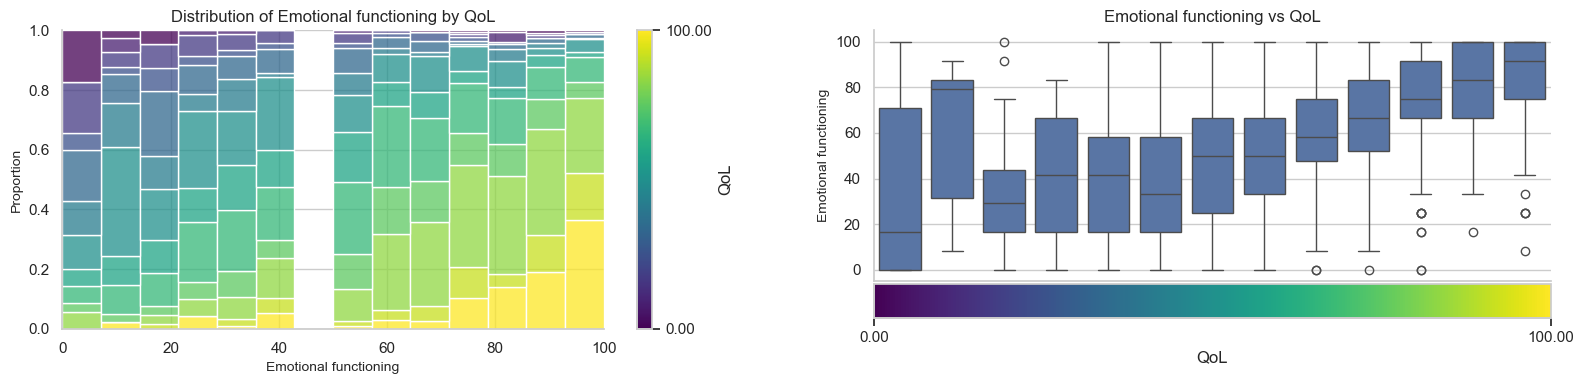



Statistics for Emotional functioning by QoL values:



,count,mean,std,min,25%,50%,75%,max
QoL,,,,,,,,
0.00,15.00,31.67,38.99,0.00,0.00,16.67,70.83,100.00
8.33,12.00,59.03,32.07,8.33,31.25,79.17,83.33,91.67
16.67,36.00,32.18,25.60,0.00,16.67,29.17,43.75,100.00
25.00,27.00,42.28,25.42,0.00,16.67,41.67,66.67,83.33
33.33,77.00,39.61,26.01,0.00,16.67,41.67,58.33,100.00
41.67,57.00,40.79,27.71,0.00,16.67,33.33,58.33,100.00
50.00,180.00,48.33,25.96,0.00,25.00,50.00,66.67,100.00
58.33,116.00,50.65,23.24,0.00,33.33,50.00,66.67,100.00
66.67,252.00,59.82,22.52,0.00,47.92,58.33,75.00,100.00


In [13]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Emotional functioning')

### Cognitive Functioning

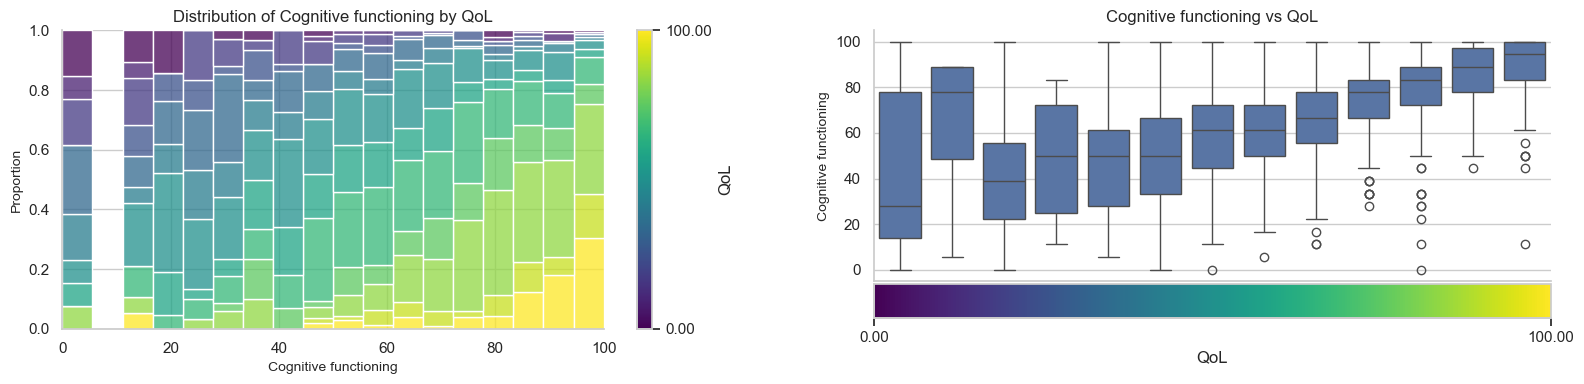



Statistics for Cognitive functioning by QoL values:



,count,mean,std,min,25%,50%,75%,max
QoL,,,,,,,,
0.00,15.00,40.00,34.83,0.00,13.89,27.78,77.78,100.00
8.33,12.00,63.43,30.29,5.56,48.61,77.78,88.89,88.89
16.67,36.00,41.82,24.07,0.00,22.22,38.89,55.56,100.00
25.00,27.00,48.56,24.54,11.11,25.00,50.00,72.22,83.33
33.33,77.00,47.84,23.45,5.56,27.78,50.00,61.11,100.00
41.67,57.00,50.49,24.36,0.00,33.33,50.00,66.67,100.00
50.00,180.00,57.62,22.48,0.00,44.44,61.11,72.22,100.00
58.33,116.00,60.06,19.49,5.56,50.00,61.11,72.22,100.00
66.67,252.00,67.46,17.99,11.11,55.56,66.67,77.78,100.00


In [14]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Cognitive functioning')


### Social Functioning

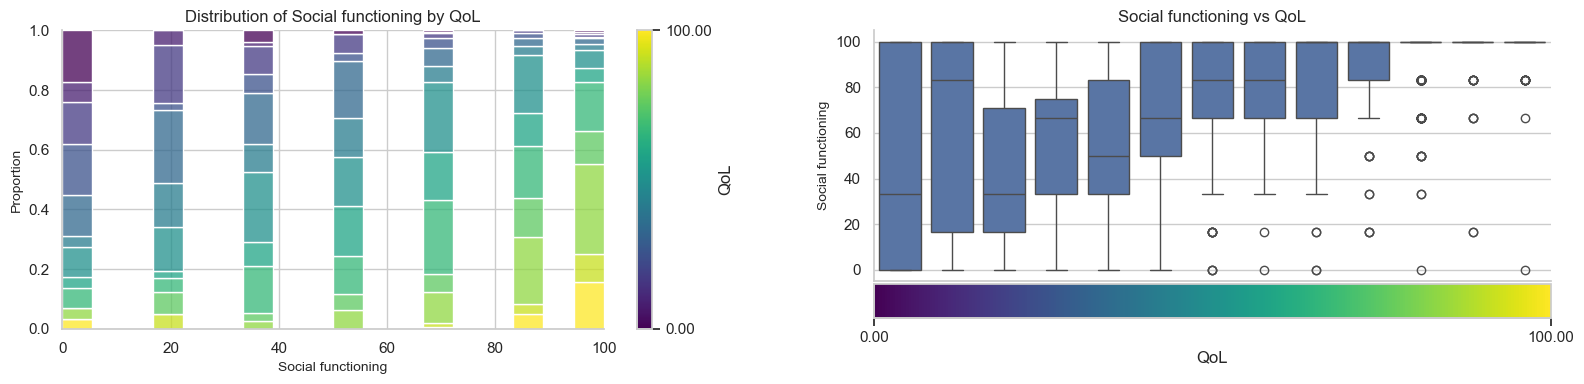



Statistics for Social functioning by QoL values:



,count,mean,std,min,25%,50%,75%,max
QoL,,,,,,,,
0.00,15.00,47.78,43.13,0.00,0.00,33.33,100.00,100.00
8.33,12.00,61.11,44.00,0.00,16.67,83.33,100.00,100.00
16.67,36.00,46.76,34.23,0.00,16.67,33.33,70.83,100.00
25.00,27.00,51.85,34.07,0.00,33.33,66.67,75.00,100.00
33.33,77.00,56.06,30.82,0.00,33.33,50.00,83.33,100.00
41.67,57.00,64.33,29.62,0.00,50.00,66.67,100.00,100.00
50.00,180.00,72.50,25.19,0.00,66.67,83.33,100.00,100.00
58.33,116.00,76.58,21.98,0.00,66.67,83.33,100.00,100.00
66.67,252.00,84.13,21.54,0.00,66.67,100.00,100.00,100.00


In [15]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Social functioning')


### Fatigue

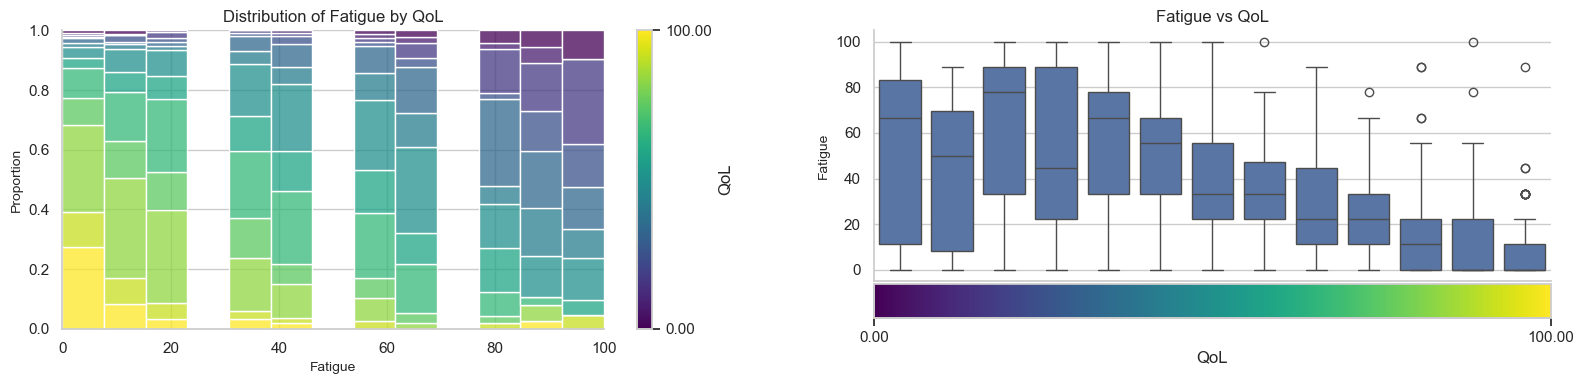



Statistics for Fatigue by QoL values:



,count,mean,std,min,25%,50%,75%,max
QoL,,,,,,,,
0.00,15.00,50.37,39.81,0.00,11.11,66.67,83.33,100.00
8.33,12.00,43.52,35.28,0.00,8.33,50.00,69.44,88.89
16.67,36.00,63.58,32.16,0.00,33.33,77.78,88.89,100.00
25.00,27.00,51.85,33.76,0.00,22.22,44.44,88.89,100.00
33.33,77.00,55.12,26.94,0.00,33.33,66.67,77.78,100.00
41.67,57.00,49.12,27.85,0.00,33.33,55.56,66.67,100.00
50.00,180.00,40.19,24.31,0.00,22.22,33.33,55.56,100.00
58.33,116.00,34.67,22.80,0.00,22.22,33.33,47.22,100.00
66.67,252.00,27.82,20.24,0.00,11.11,22.22,44.44,88.89


In [16]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Fatigue')


### Nausea and Vomiting

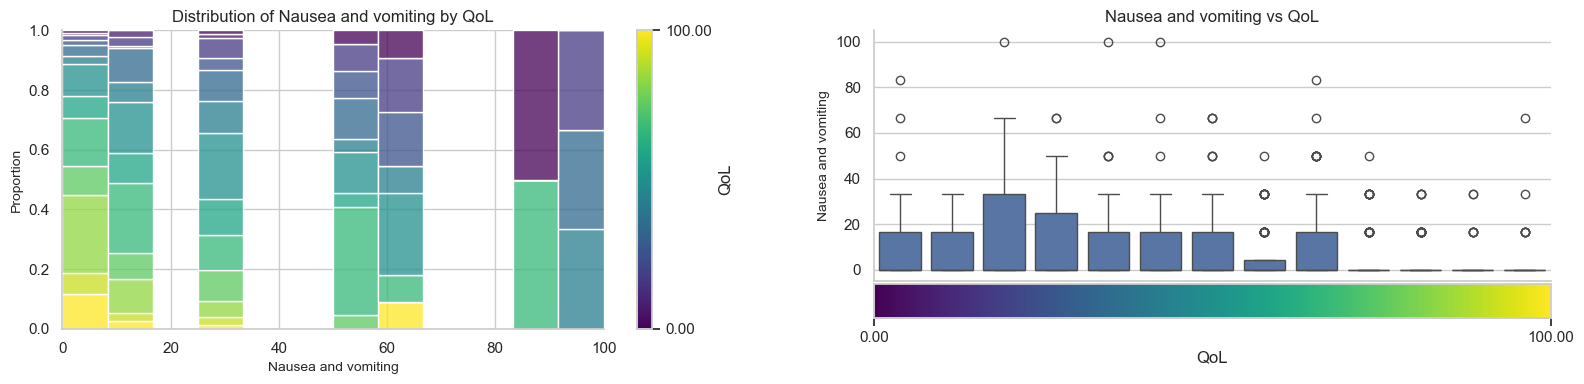



Statistics for Nausea and vomiting by QoL values:



,count,mean,std,min,25%,50%,75%,max
QoL,,,,,,,,
0.00,15.00,15.56,28.50,0.00,0.00,0.00,16.67,83.33
8.33,12.00,8.33,11.24,0.00,0.00,0.00,16.67,33.33
16.67,36.00,16.67,24.56,0.00,0.00,0.00,33.33,100.00
25.00,27.00,12.96,22.33,0.00,0.00,0.00,25.00,66.67
33.33,77.00,11.47,17.16,0.00,0.00,0.00,16.67,100.00
41.67,57.00,12.28,19.29,0.00,0.00,0.00,16.67,100.00
50.00,180.00,8.15,14.37,0.00,0.00,0.00,16.67,66.67
58.33,116.00,5.75,11.01,0.00,0.00,0.00,4.17,50.00
66.67,252.00,6.35,13.20,0.00,0.00,0.00,16.67,83.33


In [17]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Nausea and vomiting')


### Pain

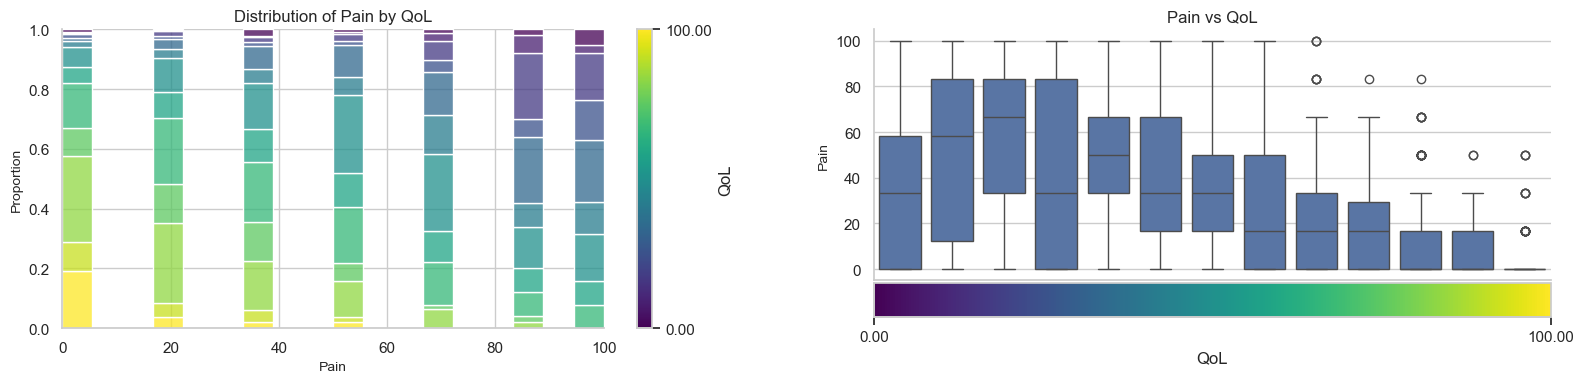



Statistics for Pain by QoL values:



,count,mean,std,min,25%,50%,75%,max
QoL,,,,,,,,
0.00,15.00,36.67,36.30,0.00,0.00,33.33,58.33,100.00
8.33,12.00,48.61,37.24,0.00,12.50,58.33,83.33,100.00
16.67,36.00,60.65,33.13,0.00,33.33,66.67,83.33,100.00
25.00,27.00,44.44,39.22,0.00,0.00,33.33,83.33,100.00
33.33,77.00,49.78,30.17,0.00,33.33,50.00,66.67,100.00
41.67,57.00,39.77,31.30,0.00,16.67,33.33,66.67,100.00
50.00,180.00,32.78,27.51,0.00,16.67,33.33,50.00,100.00
58.33,116.00,26.87,26.26,0.00,0.00,16.67,50.00,100.00
66.67,252.00,20.30,22.64,0.00,0.00,16.67,33.33,100.00


In [18]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Pain')


### Dyspnea

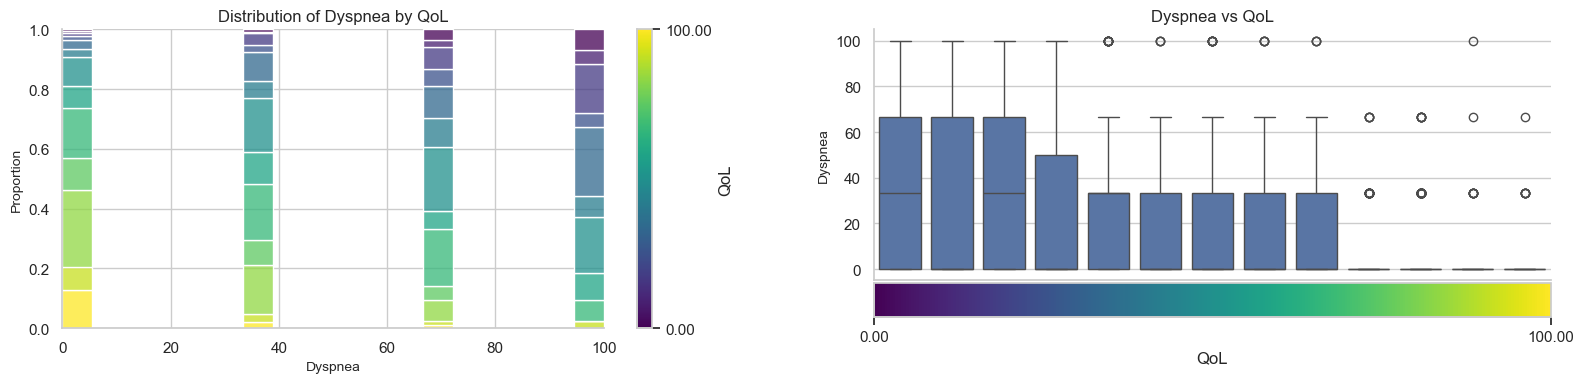



Statistics for Dyspnea by QoL values:



,count,mean,std,min,25%,50%,75%,max
QoL,,,,,,,,
0.00,15.00,37.78,41.53,0.00,0.00,33.33,66.67,100.00
8.33,12.00,30.56,41.34,0.00,0.00,0.00,66.67,100.00
16.67,36.00,41.67,36.84,0.00,0.00,33.33,66.67,100.00
25.00,27.00,27.16,33.38,0.00,0.00,0.00,50.00,100.00
33.33,77.00,32.47,34.19,0.00,0.00,33.33,33.33,100.00
41.67,57.00,23.98,30.05,0.00,0.00,0.00,33.33,100.00
50.00,180.00,20.37,28.05,0.00,0.00,0.00,33.33,100.00
58.33,116.00,14.94,24.61,0.00,0.00,0.00,33.33,100.00
66.67,252.00,12.43,21.96,0.00,0.00,0.00,33.33,100.00


In [19]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Dyspnea')


### Insomnia

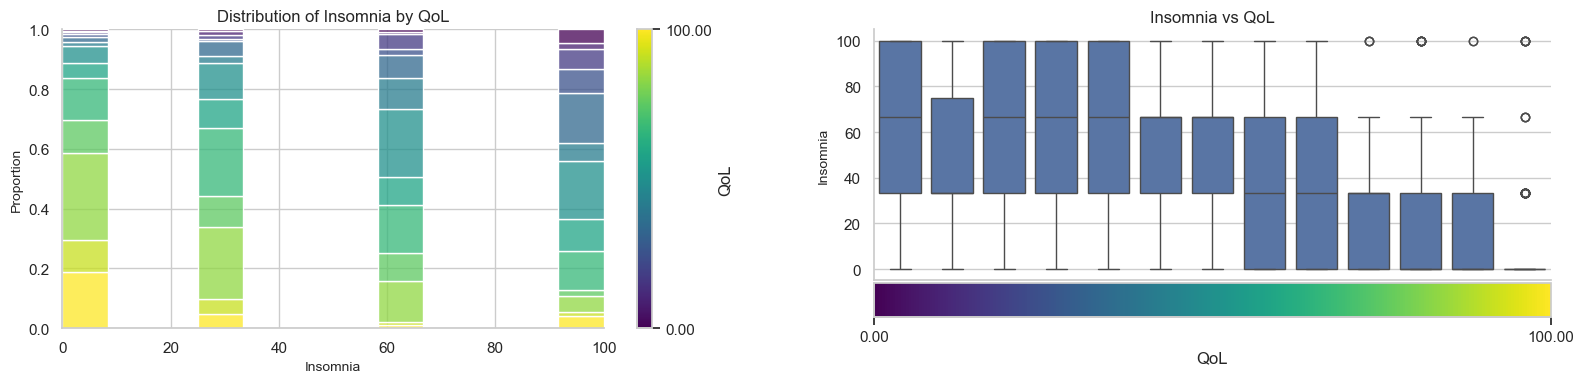



Statistics for Insomnia by QoL values:



,count,mean,std,min,25%,50%,75%,max
QoL,,,,,,,,
0.00,15.00,62.22,41.53,0.00,33.33,66.67,100.00,100.00
8.33,12.00,50.00,36.24,0.00,33.33,33.33,75.00,100.00
16.67,36.00,60.19,33.64,0.00,33.33,66.67,100.00,100.00
25.00,27.00,62.96,40.65,0.00,33.33,66.67,100.00,100.00
33.33,77.00,60.17,34.22,0.00,33.33,66.67,100.00,100.00
41.67,57.00,56.14,30.31,0.00,33.33,66.67,66.67,100.00
50.00,180.00,49.44,32.58,0.00,33.33,66.67,66.67,100.00
58.33,116.00,41.38,33.08,0.00,0.00,33.33,66.67,100.00
66.67,252.00,33.07,30.49,0.00,0.00,33.33,66.67,100.00


In [20]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Insomnia')


### Appetite Loss

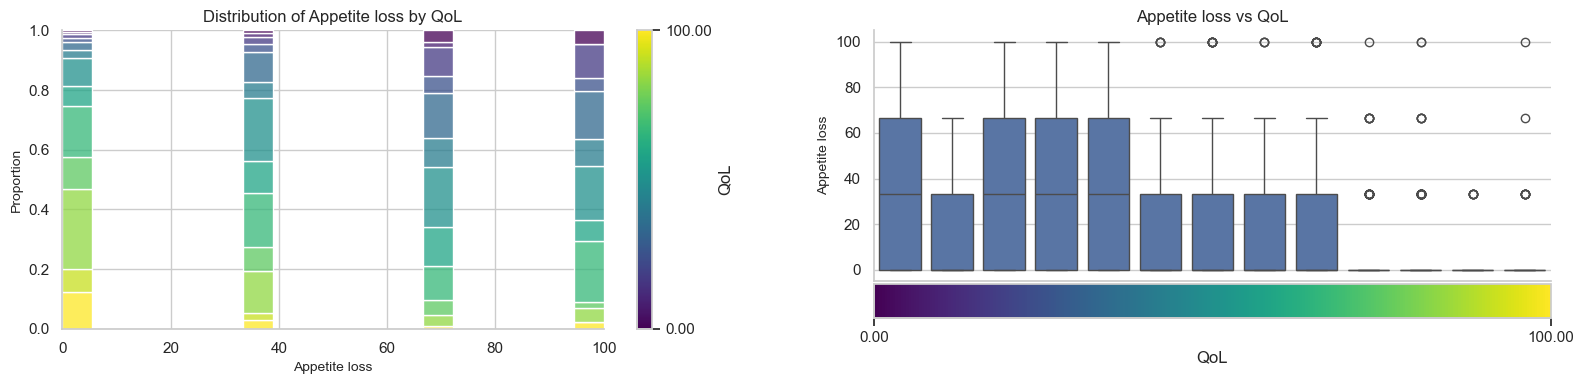



Statistics for Appetite loss by QoL values:



,count,mean,std,min,25%,50%,75%,max
QoL,,,,,,,,
0.00,15.00,35.56,38.76,0.00,0.00,33.33,66.67,100.00
8.33,12.00,19.44,26.43,0.00,0.00,0.00,33.33,66.67
16.67,36.00,37.96,37.50,0.00,0.00,33.33,66.67,100.00
25.00,27.00,29.63,33.76,0.00,0.00,33.33,66.67,100.00
33.33,77.00,33.33,32.89,0.00,0.00,33.33,66.67,100.00
41.67,57.00,26.32,32.57,0.00,0.00,0.00,33.33,100.00
50.00,180.00,21.48,28.54,0.00,0.00,0.00,33.33,100.00
58.33,116.00,18.10,26.88,0.00,0.00,0.00,33.33,100.00
66.67,252.00,12.43,24.62,0.00,0.00,0.00,33.33,100.00


In [21]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Appetite loss')


### Constipation

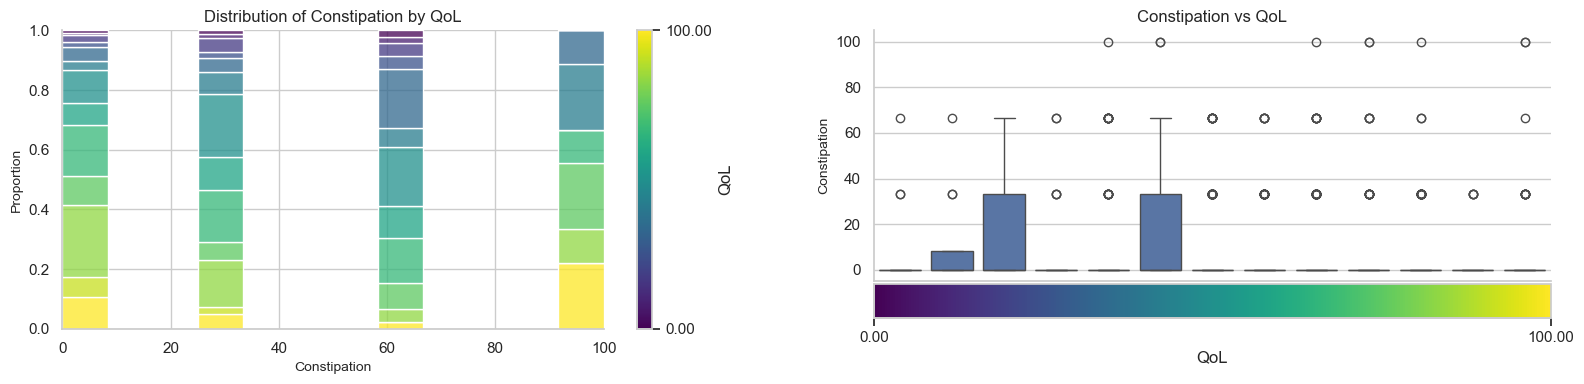



Statistics for Constipation by QoL values:



,count,mean,std,min,25%,50%,75%,max
QoL,,,,,,,,
0.00,15.00,8.89,19.79,0.00,0.00,0.00,0.00,66.67
8.33,12.00,11.11,21.71,0.00,0.00,0.00,8.33,66.67
16.67,36.00,11.11,19.52,0.00,0.00,0.00,33.33,66.67
25.00,27.00,8.64,19.81,0.00,0.00,0.00,0.00,66.67
33.33,77.00,12.55,24.80,0.00,0.00,0.00,0.00,100.00
41.67,57.00,14.04,25.16,0.00,0.00,0.00,33.33,100.00
50.00,180.00,9.81,18.54,0.00,0.00,0.00,0.00,66.67
58.33,116.00,8.05,17.37,0.00,0.00,0.00,0.00,66.67
66.67,252.00,6.08,15.97,0.00,0.00,0.00,0.00,100.00


In [22]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Constipation')


### Diarrhea

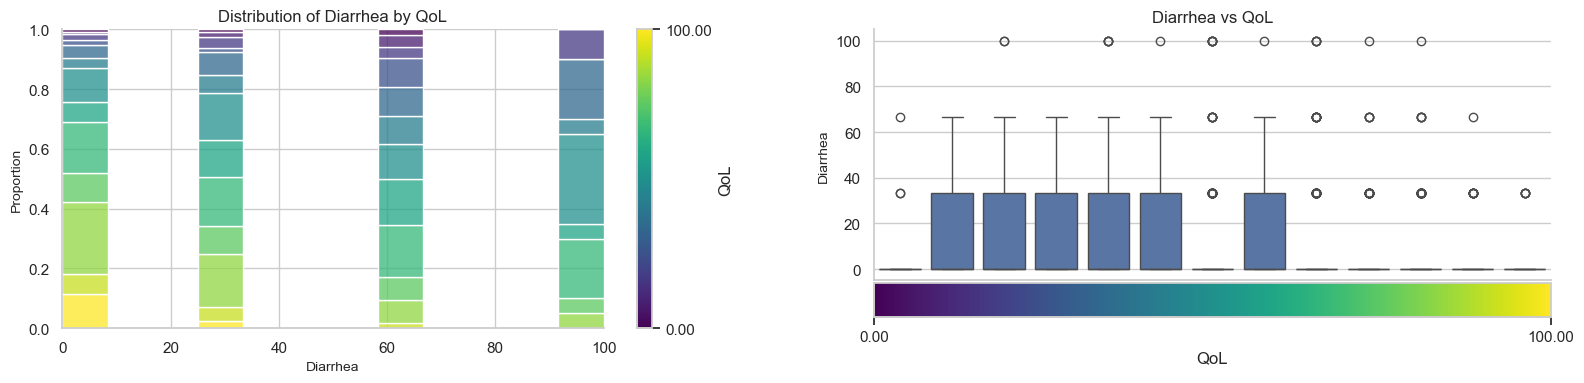



Statistics for Diarrhea by QoL values:



,count,mean,std,min,25%,50%,75%,max
QoL,,,,,,,,
0.00,15.00,8.89,19.79,0.00,0.00,0.00,0.00,66.67
8.33,12.00,19.44,26.43,0.00,0.00,0.00,33.33,66.67
16.67,36.00,15.74,28.16,0.00,0.00,0.00,33.33,100.00
25.00,27.00,16.05,26.75,0.00,0.00,0.00,33.33,66.67
33.33,77.00,16.02,27.89,0.00,0.00,0.00,33.33,100.00
41.67,57.00,14.62,24.41,0.00,0.00,0.00,33.33,100.00
50.00,180.00,11.30,23.42,0.00,0.00,0.00,0.00,100.00
58.33,116.00,12.64,21.83,0.00,0.00,0.00,33.33,100.00
66.67,252.00,8.20,19.82,0.00,0.00,0.00,0.00,100.00


In [23]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Diarrhea')


### Financial Difficulties

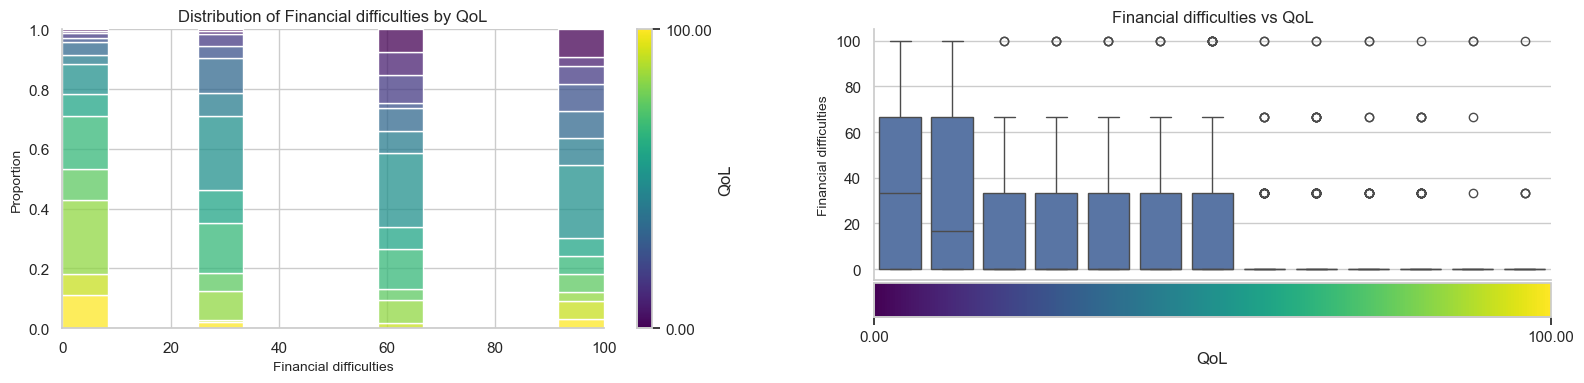



Statistics for Financial difficulties by QoL values:



,count,mean,std,min,25%,50%,75%,max
QoL,,,,,,,,
0.00,15.00,40.00,42.16,0.00,0.00,33.33,66.67,100.00
8.33,12.00,33.33,37.61,0.00,0.00,16.67,66.67,100.00
16.67,36.00,20.37,31.15,0.00,0.00,0.00,33.33,100.00
25.00,27.00,20.99,33.52,0.00,0.00,0.00,33.33,100.00
33.33,77.00,14.72,25.65,0.00,0.00,0.00,33.33,100.00
41.67,57.00,16.37,28.26,0.00,0.00,0.00,33.33,100.00
50.00,180.00,15.93,27.17,0.00,0.00,0.00,33.33,100.00
58.33,116.00,8.62,20.20,0.00,0.00,0.00,0.00,100.00
66.67,252.00,5.82,16.61,0.00,0.00,0.00,0.00,100.00


In [24]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Financial difficulties')


### Análisis Multivariable

In [ ]:
corr_matrix = df_C30.drop('id', axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# afn.viz_single_vs_all(df_C30.drop('id', axis=1), n_cols=5)

### 1.2 Dominio EORTC QLQ-C23

In [ ]:
# Creación del dataframe C30
columns_C23 = ['id', 'ql', 'brst', 'brbi', 'brbs', 'brfu', 'brsee', 'brsef', 'bras', 'brhl']
df_C23 = df[columns_C23]
# Asignación de nombres semánticos a las columnas
df_C23 = df_C23.rename(columns= {
    'ql': 'QoL',
    'brst': 'Arm symptoms',
    'brbi': 'Body image',
    'brbs': 'Breast symptoms',
    'brfu': 'Future perspective',
    'brsee': 'Sexual enjoyment',
    'brsef': 'Sexual functioning',
    'bras': 'Systemic therapy side effects',
    'brhl': 'Upset by hair loss',
})

In [ ]:
# Inspección de las columnas del dominio
afn.inspect_all_columns(df_C23.drop(['id', 'QoL'], axis=1))

In [ ]:
# Inspección de las variables con las mismas observaciones nulas
afn.rows_same_nulls(df_C23)


In [ ]:
df_C23[df_C23['QoL'].isnull()].head()

In [ ]:
# Distribución de las variables del dominio
afn.viz_columns_distribution(df_C23.drop(['id', 'QoL'], axis=1))

In [ ]:
# Visualización comparativa de la dispersión y la cantidad de valores nulos 
afn.viz_dispersion(df_C23.drop('QoL', axis=1))

### Arm Symptoms

In [ ]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C23, 'Arm symptoms')

### Body Image

In [ ]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C23, 'Body image')

### Breast Symptoms

In [ ]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C23, 'Breast symptoms')

### Future Perspective

In [ ]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C23, 'Future perspective')

### Sexual Enjoyment

In [ ]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C23, 'Sexual enjoyment')

### Sexual Functioning

In [ ]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C23, 'Sexual functioning')

### Systemic therapy side effects

In [ ]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C23, 'Systemic therapy side effects')

### Upset by Hair Loss

In [ ]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C23, 'Upset by hair loss')

### Análisis Multivariable

In [ ]:
corr_matrix = df_C23.drop('id', axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# afn.viz_single_vs_all(df_C23.drop('id', axis=1), hue_var=None, n_cols=4)

### 1.4 Dominio EORTC QLQ-C30 U EORTC QLQ-C23

In [ ]:
df_QLQ = pd.concat([df_C30, df_C23], axis=1)
df_QLQ.drop(['Upset by hair loss', 'Sexual enjoyment'], axis=1, inplace=True)
df_QLQ.dropna(inplace=True)

In [ ]:
corr_matrix = df_QLQ.drop('id', axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### 2 Preaparación de los datos

In [ ]:
# Gráfica de la distribución
#sns.histplot(data=df_C30, x='QoL', kde=True)

In [ ]:
#df_C30['QoL'] = df_C30['QoL'].round(2)

In [ ]:
#discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
#df_qlq_C30_null = df_C30[df_C30.isnull().any(axis=1)].copy()
#df_C30.dropna(axis=0, inplace=True)
#df_C30['QoL_bins'] = discretizer.fit_transform(df_C30[['QoL']])
#df_C30['QoL_bins'].value_counts()